Grupo:
- 02201055 - Eduardo Cavalcanti
- 01201027 - Fernando Fialho 
- 02201015 - Francescolly Santos
- 02201043 - Jennifer Silva 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Preparação de Dados

In [7]:
df = pd.read_csv("dataset_phishing.csv")
df = df.drop(columns=['url'])

df.head(10)

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
5,32,24,0,3,1,0,0,0,0,0,...,1,1,1,0,-1,0,0,1,0,phishing
6,19,12,0,2,0,0,0,0,0,0,...,0,1,0,170,7529,0,0,0,1,legitimate
7,81,27,1,2,0,0,0,0,0,0,...,1,0,0,76,5767,0,0,1,2,phishing
8,42,34,0,2,0,0,0,0,0,0,...,1,1,0,371,7298,0,0,0,5,legitimate
9,104,10,0,1,10,0,0,0,0,0,...,1,0,0,128,9368,6774,0,0,5,legitimate


### Removendo Colunas "Desnecessárias"

Por enquanto, iremos remover todos os campos que são números calculados, já que não conhecemos o objetivo e cálculos realizados.

Então iremos realizar as análises com os dados que já conhecemos e dominamos do dataset e aos poucos, ir adicionando os "desconhecidos" e ver como irão impactar nos resultados.

Neste momento inicial, não iremos utilizar razões técnicas para escolher os os campos que serão trabalhados. Iremos buscar base técnica e auxílio para escolher os campos a serem removidos futuramente.

A base técnica que utilizaremos seguirá este artigo:
https://www.linkedin.com/pulse/maldi%C3%A7%C3%A3o-da-dimensionalidade-octaviano-silva/?originalSubdomain=pt

Dentre as técnicas utilizadas para redução de dimensionalidade, teremos:

- Remoção das características com altas correlações;
- PCA (Análise do Componente Principal).

In [8]:
df = df.drop(columns=['ratio_digits_url', 'ratio_digits_host', 'avg_words_raw', 
                      'avg_word_host', 'avg_word_path', 'ratio_intHyperlinks', 
                      'ratio_extHyperlinks', 'ratio_nullHyperlinks', 
                      'ratio_intRedirection', 'ratio_extRedirection', 
                      'ratio_intErrors', 'ratio_extErrors', 'ratio_intMedia',
                      'ratio_extMedia', 'links_in_tags', 'safe_anchor'
                      ])

df.head(10)

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
5,32,24,0,3,1,0,0,0,0,0,...,1,1,1,0,-1,0,0,1,0,phishing
6,19,12,0,2,0,0,0,0,0,0,...,0,1,0,170,7529,0,0,0,1,legitimate
7,81,27,1,2,0,0,0,0,0,0,...,1,0,0,76,5767,0,0,1,2,phishing
8,42,34,0,2,0,0,0,0,0,0,...,1,1,0,371,7298,0,0,0,5,legitimate
9,104,10,0,1,10,0,0,0,0,0,...,1,0,0,128,9368,6774,0,0,5,legitimate


Procurando dados faltantes na tabela

In [10]:
qtd_na = df.isna().sum().sum()
qtd_null = df.isnull().sum().sum()

print('qtd_na: ' + str(qtd_na))
print('qtd_null: ' + str(qtd_null))

qtd_na: 0
qtd_null: 0


Dado que não foi encontrada nenhuma obserção com dados faltantes, não foi necessária a remoção de nenhuma ou substituição de valores (nessa etapa)

##Separando X e y

Variável Dependente:

---


Vamos utilizar a variável “status” do nosso conjunto de dados. É ela que precisar ser “descoberta” ou explicada, pois é influenciada e afetada pelas variáveis independentes.  Ou seja, dentro do nosso dataset ela é um fator/consequência da resposta de algo que foi manipulado pela variável independente. 


Separando em dois datasets as vars X e y

In [11]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X - Variáveis independentes

In [12]:
X.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,37,19,0,3,0,0,0,0,0,0,...,0,0,1,0,45,-1,0,1,1,4
1,77,23,1,1,0,0,0,0,0,0,...,0,1,0,0,77,5767,0,0,1,2
2,126,50,1,4,1,0,1,2,0,3,...,0,1,0,0,14,4004,5828815,0,1,0
3,18,11,0,2,0,0,0,0,0,0,...,0,1,0,0,62,-1,107721,0,0,3
4,55,15,0,2,2,0,0,0,0,0,...,0,0,1,0,224,8175,8725,0,0,6


Identificando maior valor existente em X

In [13]:
X.max().max()

10767986

y - Variaveis dependentes

In [14]:
y.head()

0    legitimate
1      phishing
2      phishing
3    legitimate
4    legitimate
Name: status, dtype: object

## Padronização das Variaveis Independentes (X)

###Opção 1: Padronização com StandardScaler

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_X = sc.fit_transform(X)
print(df_X)

[[-0.43632748 -0.19396372 -0.42102044 ...  6.97822701  0.93426411
   0.32097385]
 [ 0.28706655  0.17720743  2.37518157 ... -0.14330288  0.93426411
  -0.46740717]
 [ 1.17322424  2.6826127   2.37518157 ... -0.14330288  0.93426411
  -1.25578819]
 ...
 [ 0.79344237 -0.47234208  2.37518157 ... -0.14330288  0.93426411
   2.68611691]
 [-0.41824263  0.82675695 -0.42102044 ... -0.14330288 -1.07036115
   0.32097385]
 [ 7.52100688 -0.65792766  2.37518157 ...  6.97822701  0.93426411
  -1.25578819]]


In [16]:
df_X.max()

77.7885777970712

###Opção 2: Padronização com MinMaxScaler

In [17]:
from sklearn.preprocessing import MinMaxScaler  

sc = MinMaxScaler()
df_X = sc.fit_transform(X)

print(df_X) 

[[0.01534684 0.07142857 0.         ... 1.         1.         0.4       ]
 [0.03990178 0.09047619 1.         ... 0.         1.         0.2       ]
 [0.06998158 0.21904762 1.         ... 0.         1.         0.        ]
 ...
 [0.05709024 0.05714286 1.         ... 0.         1.         1.        ]
 [0.01596071 0.12380952 0.         ... 0.         0.         0.4       ]
 [0.2854512  0.04761905 1.         ... 1.         1.         0.        ]]


In [18]:
df_X.max()

1.0000000000000002

###Tranformando em dataframe o array retornado na padronização

Pegando lista das variáveis

In [19]:
X.columns

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde',
       'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'punycode', 'port',
       'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain',
       'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'phish_hints',
       'domain_in_brand', 'brand_in_subdomain', 'brand_in_path',
       'suspecious_tld', 'statistical_report', 'nb_hyperlinks', 'nb_extCSS',
       'login_form', 'external_favicon', 'submit_email', 'sfh', 'iframe',
       'p

In [20]:
df_X = pd.DataFrame(df_X, columns=['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde',
       'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'punycode', 'port',
       'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain',
       'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'phish_hints',
       'domain_in_brand', 'brand_in_subdomain', 'brand_in_path',
       'suspecious_tld', 'statistical_report', 'nb_hyperlinks', 'nb_extCSS',
       'login_form', 'external_favicon', 'submit_email', 'sfh', 'iframe',
       'popup_window', 'onmouseover', 'right_clic', 'empty_title',
       'domain_in_title', 'domain_with_copyright', 'whois_registered_domain',
       'domain_registration_length', 'domain_age', 'web_traffic', 'dns_record',
       'google_index', 'page_rank'])

df_X.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,0.015347,0.071429,0.0,0.086957,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,1.0,0.0,0.001542,0.000854,0.000000,1.0,1.0,0.4
1,0.039902,0.090476,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,1.0,0.0,0.0,0.002615,0.448471,0.000000,0.0,1.0,0.2
2,0.069982,0.219048,1.0,0.130435,0.023256,0.0,0.333333,0.105263,0.0,0.157895,...,0.0,1.0,0.0,0.0,0.000503,0.311656,0.541310,0.0,1.0,0.0
3,0.003683,0.033333,0.0,0.043478,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,1.0,0.0,0.0,0.002112,0.000854,0.010004,0.0,0.0,0.3
4,0.026397,0.052381,0.0,0.043478,0.046512,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,1.0,0.0,0.007543,0.635341,0.000810,0.0,0.0,0.6


In [21]:
df_X.max()

length_url         1.0
length_hostname    1.0
ip                 1.0
nb_dots            1.0
nb_hyphens         1.0
                  ... 
domain_age         1.0
web_traffic        1.0
dns_record         1.0
google_index       1.0
page_rank          1.0
Length: 71, dtype: float64

array([[<AxesSubplot:title={'center':'length_url'}>,
        <AxesSubplot:title={'center':'length_hostname'}>,
        <AxesSubplot:title={'center':'ip'}>,
        <AxesSubplot:title={'center':'nb_dots'}>,
        <AxesSubplot:title={'center':'nb_hyphens'}>,
        <AxesSubplot:title={'center':'nb_at'}>,
        <AxesSubplot:title={'center':'nb_qm'}>,
        <AxesSubplot:title={'center':'nb_and'}>],
       [<AxesSubplot:title={'center':'nb_or'}>,
        <AxesSubplot:title={'center':'nb_eq'}>,
        <AxesSubplot:title={'center':'nb_underscore'}>,
        <AxesSubplot:title={'center':'nb_tilde'}>,
        <AxesSubplot:title={'center':'nb_percent'}>,
        <AxesSubplot:title={'center':'nb_slash'}>,
        <AxesSubplot:title={'center':'nb_star'}>,
        <AxesSubplot:title={'center':'nb_colon'}>],
       [<AxesSubplot:title={'center':'nb_comma'}>,
        <AxesSubplot:title={'center':'nb_semicolumn'}>,
        <AxesSubplot:title={'center':'nb_dollar'}>,
        <AxesSubplot:title=

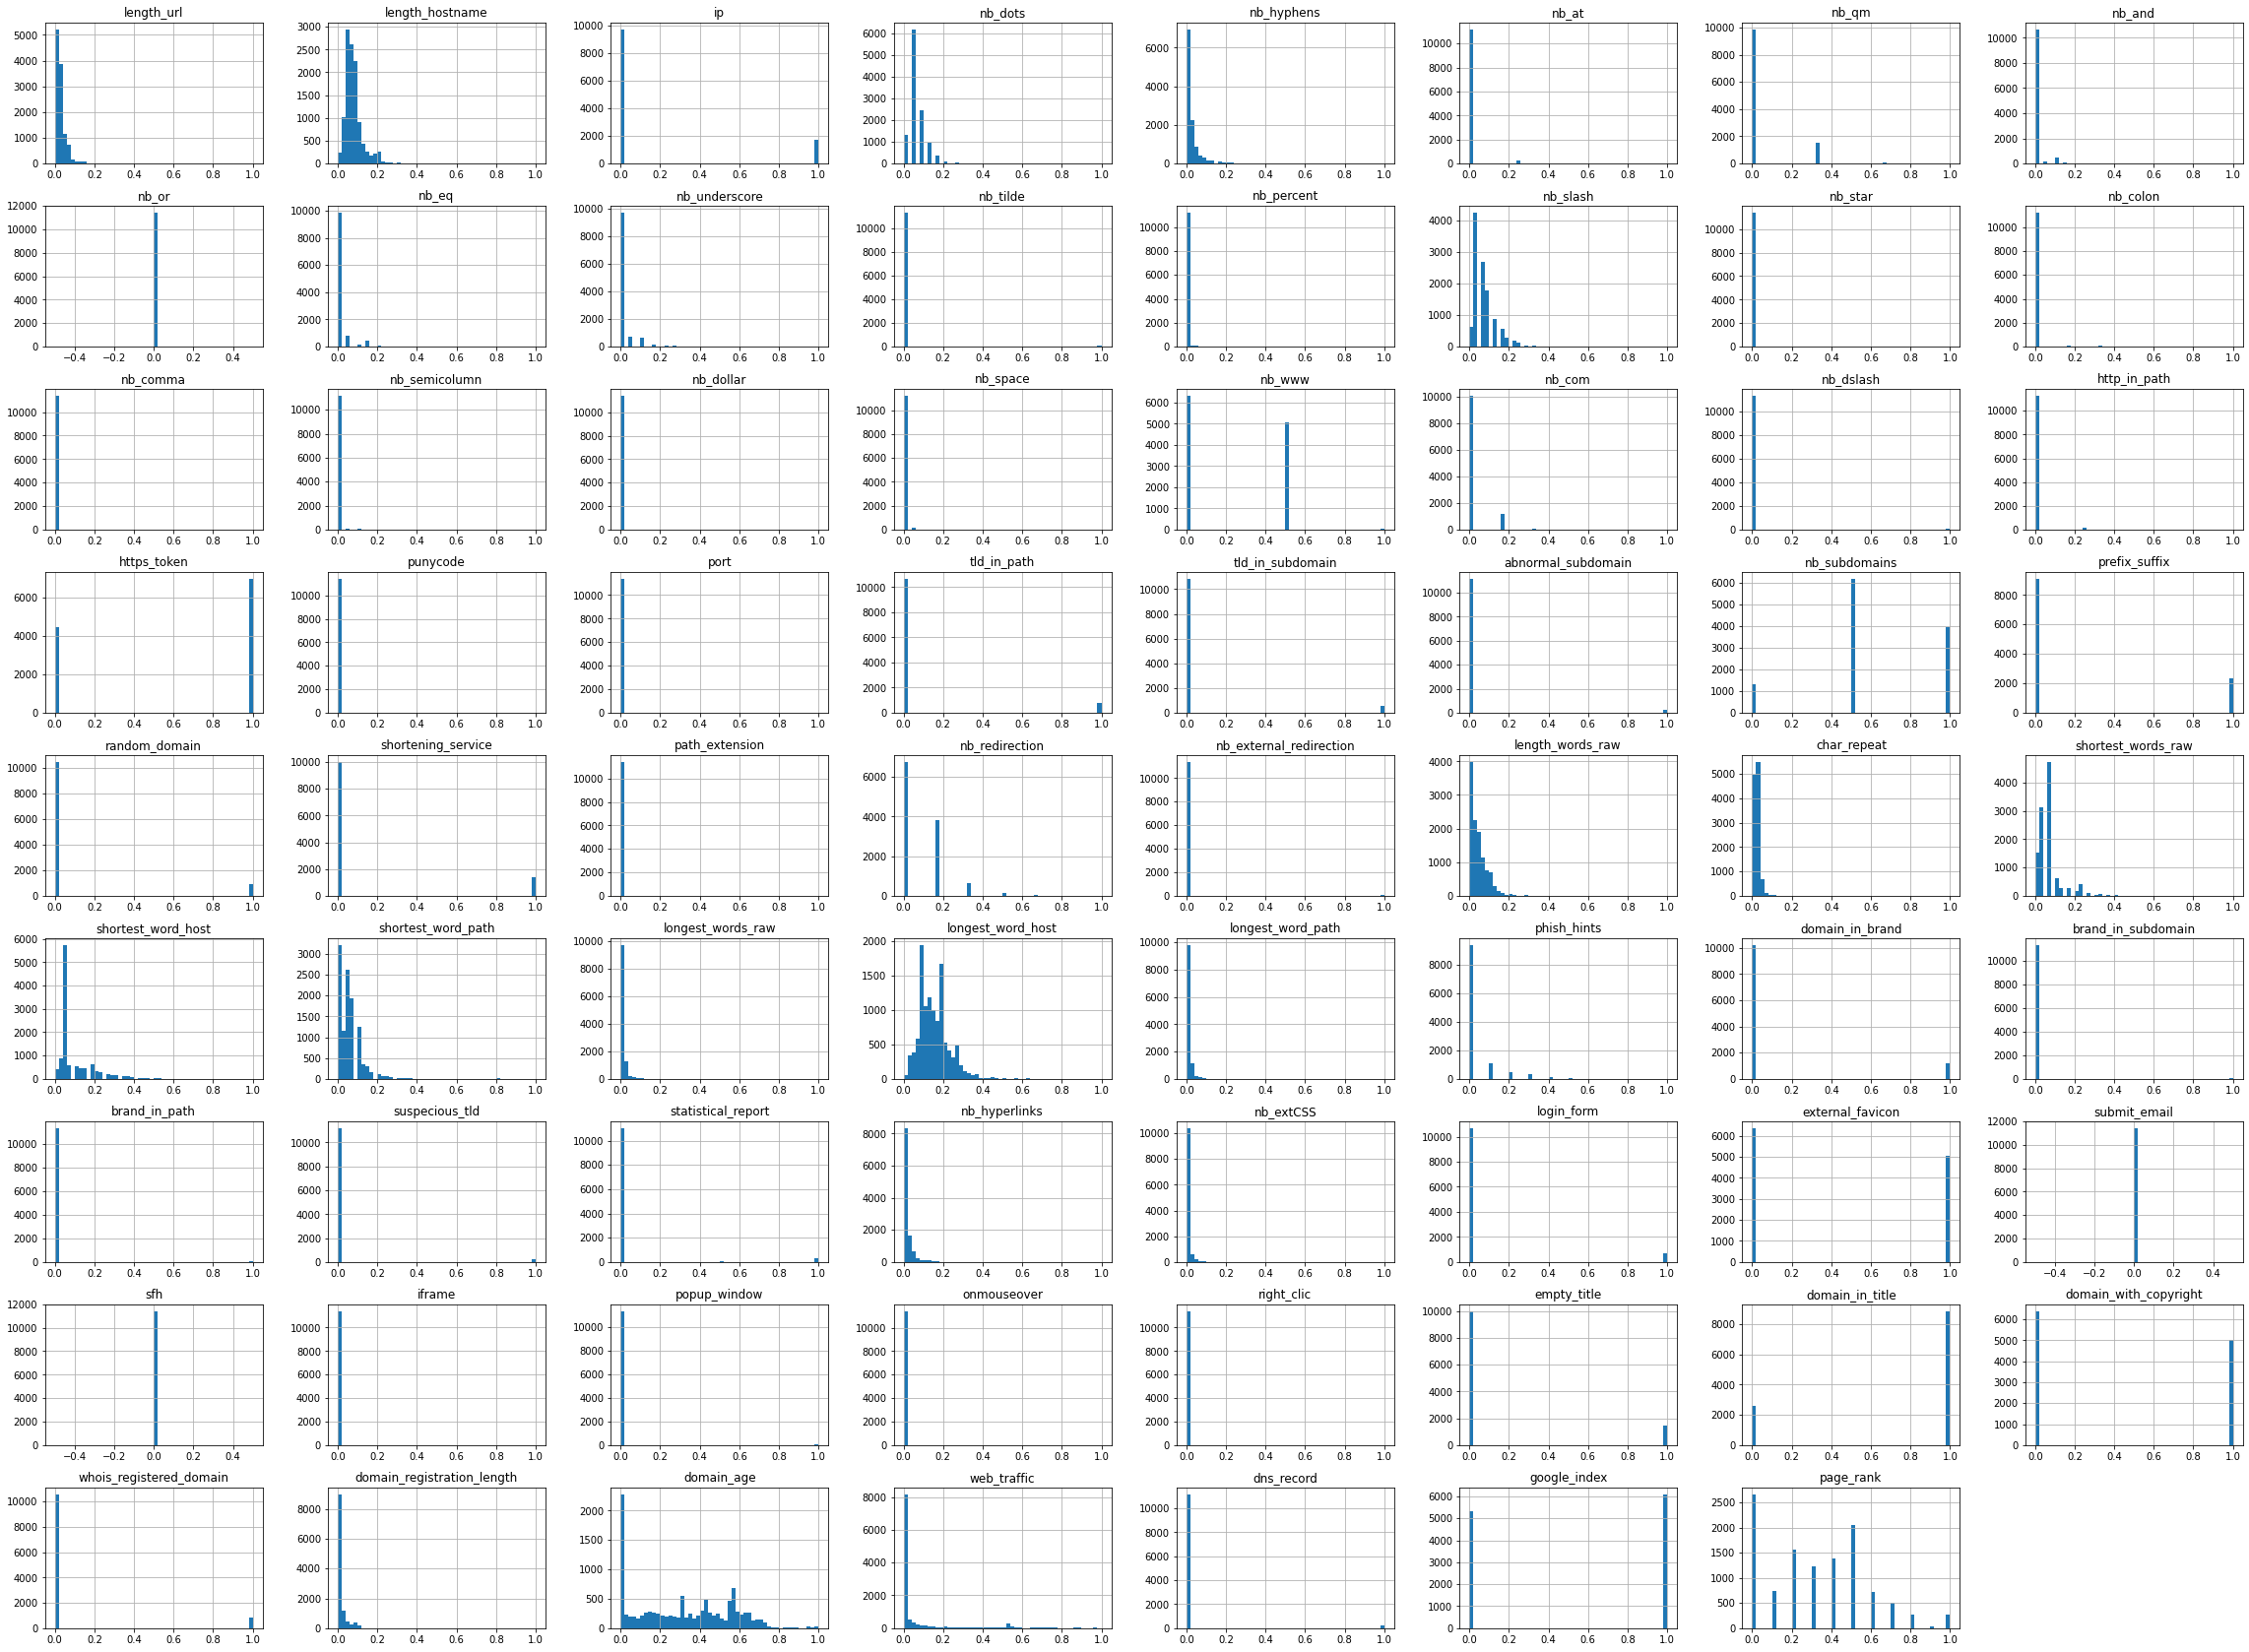

In [22]:
df_X.hist(bins=50, figsize=(40,30))

##Encoding das Variáveis Dependentes (y)

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [24]:
# legitimate 0
# phshing 1
print(y)

# ARRUMAR --> transformar em dataframe

[0 1 1 ... 0 0 1]


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 72 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   length_url                  11430 non-null  int64 
 1   length_hostname             11430 non-null  int64 
 2   ip                          11430 non-null  int64 
 3   nb_dots                     11430 non-null  int64 
 4   nb_hyphens                  11430 non-null  int64 
 5   nb_at                       11430 non-null  int64 
 6   nb_qm                       11430 non-null  int64 
 7   nb_and                      11430 non-null  int64 
 8   nb_or                       11430 non-null  int64 
 9   nb_eq                       11430 non-null  int64 
 10  nb_underscore               11430 non-null  int64 
 11  nb_tilde                    11430 non-null  int64 
 12  nb_percent                  11430 non-null  int64 
 13  nb_slash                    11430 non-null  in

In [26]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


# Subdataframes

In [27]:
# Divide o DataFrame em sub-dataframes por categoria
sub_dfs = dict(tuple(df.groupby('status')))

df_phishing = sub_dfs.get('phishing')
df_phishing = df_phishing.drop(columns=['status'])

df_legitimate = sub_dfs.get('legitimate')
df_legitimate = df_legitimate.drop(columns=['status'])


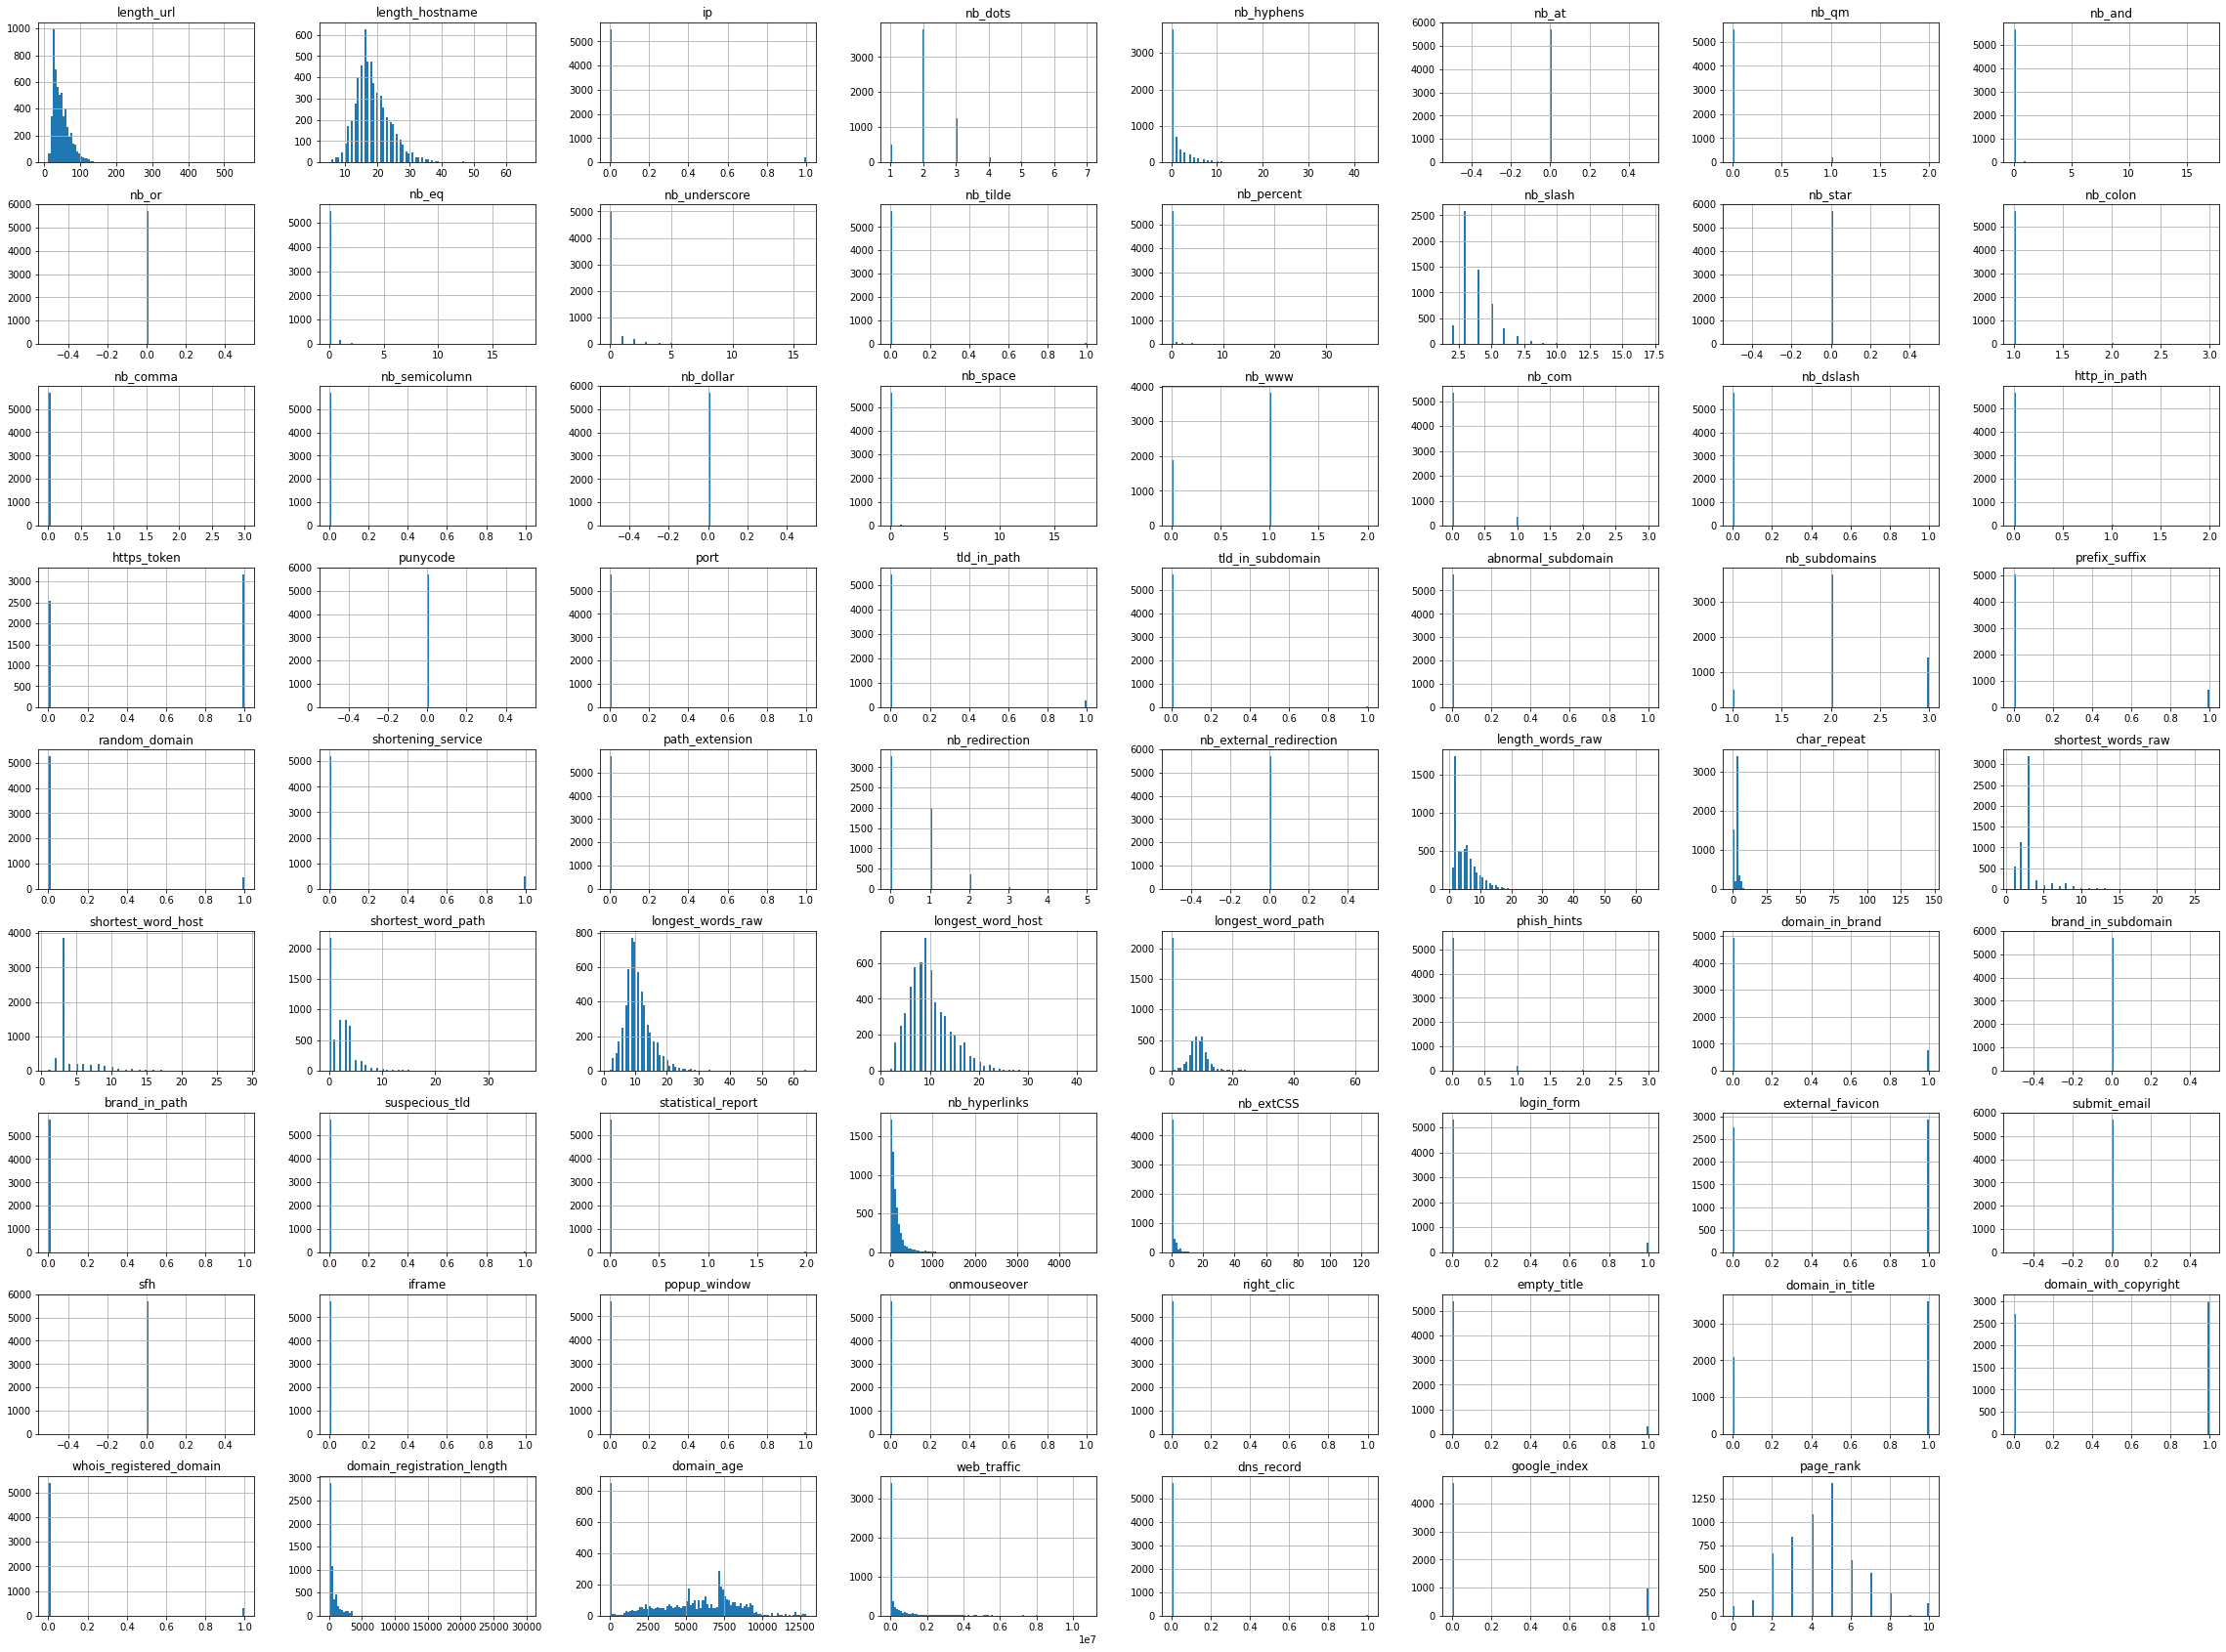

In [30]:
df_legitimate.hist(bins=100, figsize=(40,30))
plt.show()